In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_parquet('../data/stage/3m/features_gold.parquet')

In [110]:
df_nps = pd.read_csv('../data/raw/nps/PESQUISA_SATISFACAO_NPS_20211108_151208.csv', delimiter='|',encoding= 'iso-8859-1')

In [3]:
df.head()

,consumer_id,target,mercadopago_id,allow_promos,total_sent_pushs_1m,total_open_pushs_1m,total_pushs_bounced_1m,total_pushs_bounced_3m,total_emails_open_1m,total_emails_open_3m,total_emails_sent_1m,total_emails_sent_3m,distinct_reason_1m,distinct_reason_3m,mode_rating_reason_3m,max_diff_total_ratings,mm_total_ratings_reason,mm_total_ratings,trend_total_ratings,mean_rating_1m,mean_rating_3m,distinct_voucher_id_1m,mm_vouchers,mm_redeemed_vouchers,trend_redeemed_vouchers,distinct_reward_id_3m,mean_redeemed_discount_amount_3m,sum_redeemed_discount_amount_3m,p_discount_1m,mean_total_value_3m,sum_total_discont_3m,max_diff_stores,mm_transactions_partners,mm_total_value_partners,mob,sum_loyalty_discount_amount_1m,mm_loyalty_amount,max_num_comments_3m,tickets_1m,tickets_3m,sum_bad_rating_score_tickets,mode_channel_3m
0,3923437,1,1,1,0,0,0,5,0,0,4,35,1,1,ATENDIMENTO,0,5.0,16.666667,0.0,5.0,5.0,1,4.666667,4.666667,-7,2,1141.142857,15976.0,20.000000,7674.785714,15976.0,3,4.000000,26693.666667,3,220.0,-374.000000,0,0,0,0,884.0
1,3913125,1,1,1,0,0,0,0,2,2,5,7,0,0,None,1,4.5,3.000000,0.0,4.5,4.5,2,0.666667,0.666667,0,2,659.000000,1318.0,1.901327,34660.000000,1318.0,1,0.666667,23106.666667,3,-38.0,-12.666667,0,0,0,0,[112. 884.]
2,3927102,1,0,1,0,0,0,0,2,20,4,36,0,0,None,0,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,NaN,3,323.0,184.666667,0,0,0,0,None
3,3923444,0,1,1,0,0,0,0,1,19,4,29,0,0,None,0,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0,0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,NaN,3,0.0,11.333333,0,0,0,0,None
4,3928419,1,1,1,0,0,0,1,1,1,3,9,0,0,None,0,0.0,0.000000,0.0,0.0,0.0,1,0.666667,0.666667,0,2,114.000000,228.0,0.000000,4000.000000,28.0,0,0.666667,2666.666667,3,23.0,7.666667,0,0,0,0,[ 112. 1030.]


In [ ]:
#max_num_comments_3m 	tickets_1m 	tickets_3m 	sum_bad_rating_score_tickets

In [11]:
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


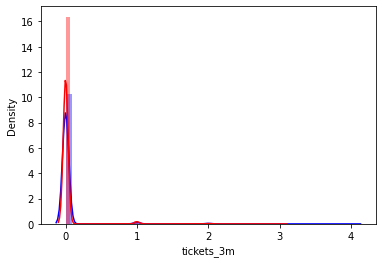

In [20]:
sns.distplot(df_0['tickets_3m'], color='blue')
sns.distplot(df_1['tickets_3m'], color='red')
plt.show()

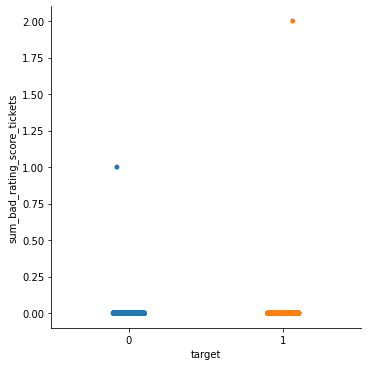

In [10]:
sns.catplot(x="target", y="sum_bad_rating_score_tickets", data=df)

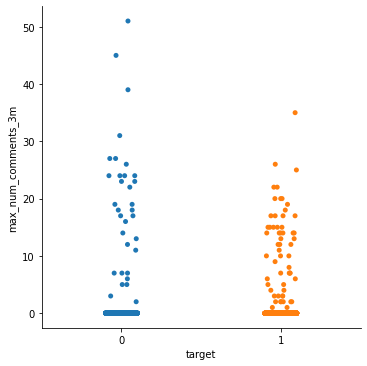

In [8]:
sns.catplot(x="target", y="max_num_comments_3m", data=df)

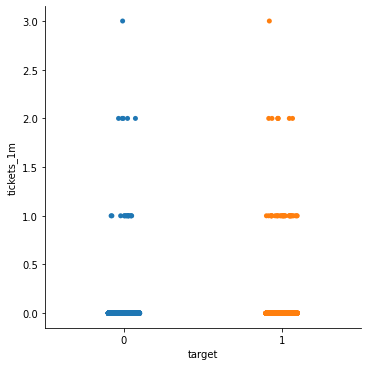

In [7]:
sns.catplot(x="target", y="tickets_1m", data=df)

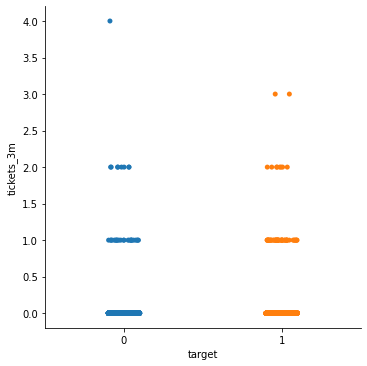

In [9]:
sns.catplot(x="target", y="tickets_3m", data=df)

In [111]:
df_nps['NOTA_RECOMENDACAO']= pd.to_numeric(df_nps['NOTA_RECOMENDACAO'], errors='coerce', downcast='integer')
df_nps['CREATED_DATE_'] = pd.to_datetime(df_nps['CREATED_DATE_'])

In [112]:
df_nps = df_nps[df_nps['NOTA_RECOMENDACAO'].notna()]

In [113]:
mask = (df_nps['CREATED_DATE_'] > '2021-04-01') & (df_nps['CREATED_DATE_'] < '2021-05-01') & (df_nps['NOTA_RECOMENDACAO'] < 8)

In [67]:
df_customers = pd.read_parquet('../data/raw/3m/customers.parquet')

In [75]:
transactions = pd.read_parquet('../data/stage/3m/full_transactions.parquet')

In [114]:
transactions['consumer_id'] = pd.to_numeric(transactions['consumer_id'], errors='coerce', downcast='integer')

In [115]:
transactions = transactions[transactions['consumer_id'].notna()]

In [116]:
transactions.loc[:,'consumer_id'] = transactions['consumer_id'].astype('int')

In [69]:
df_customers['email'].head()

,consumer_id,role_id,cpf,first_name,last_name,email,birthdate,zipcode,street,street_number,complement,city,state,phonenumber,password_hash,created_at,updated_at,eou_synced_at,last_activity_date,completed_at,paypal_linked_at,braintree_id,braintree_token,paypal_id,paypal_billing_agreement,paypal_email,paypal_cpf,paydiant_uri,paydiant_linked_at,stone_wallet_id,stone_linked_at,allow_newsletter,allow_promos,paypal_allow_automatic_payment,allow_automatic_payment,paypal_subscription_canceled,active,signup_complete,legacy_email,legacy_paypal_id,legacy_paypal_subscription,city_id,referral_code,mercadopago_linked_at,mercadopago_email,mercadopago_id,mfa_validated,country,datalake_dt,year_ptt,month_ptt,day_ptt
0,3913503,7,05493872340,None,None,None,None,None,None,None,None,None,None,None,$2a$10$ICth5HJtOv3jQ402b8v96.WkTepaKRK9hzvmXeX...,2020-04-06 12:46:33.000,2020-04-06 12:46:33.000,None,2020-04-06 12:46:33.000,None,None,None,None,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,None,None,None,None,None,None,None,None,REQUIRED,BRAZIL,2021-09-10,2020,4,6
1,3913788,7,07357541797,Érica,Do Amaral Silva Almeida,ericaamaral3@yahoo.com.br,1977-01-11,25212060,Avenida Nelson Mauro,474,,Duque de Caxias,RJ,21996386420,$2a$10$E8rlQLYygoak6HXERGF6DOF2rxxdvHi20daKsp8...,2020-04-06 12:58:01.000,2020-05-24 00:32:08.000,None,2020-05-24 00:32:08.000,2020-04-06 12:58:01.000,None,None,None,None,None,None,None,None,None,None,None,1,1,0,0,0,1,1,None,None,None,0,BTQ2932,None,None,None,CONFIRMED,BRAZIL,2021-09-10,2020,4,6
2,3914099,7,37487545822,Diorgenis,Nunes Da Silva,diorgenis1989@gmail.com,1989-04-21,None,None,None,None,None,None,11970436217,$2a$10$UFVp6QuVyp0V1La74iafSO9LGEyZkFNkqHX6sR9...,2020-04-06 13:09:18.000,2021-02-22 10:45:58.000,None,2021-02-22 10:45:57.000,2020-04-06 13:09:18.000,None,None,None,None,None,None,None,None,None,None,None,1,1,0,0,0,1,1,None,None,None,None,DN38767,None,None,None,CONFIRMED,BRAZIL,2021-09-10,2020,4,6
3,3914666,7,01694291561,Rejane,Nunes Dos Santos,enfrejanenunes@yahoo.com.br,1984-08-07,None,None,None,None,None,None,71991388287,$2a$10$kFU0oKse6RlEWDTlW7wbCeX5b6QdaLnSQhNN56B...,2020-04-06 13:31:27.000,2020-04-06 13:31:57.000,None,2020-04-06 13:31:28.000,2020-04-06 13:31:27.000,None,None,None,None,None,None,None,None,None,None,None,1,1,0,0,0,1,1,None,None,None,None,RN79375,None,None,None,CONFIRMED,BRAZIL,2021-09-10,2020,4,6
4,3914766,7,27229352878,Augusta,Barbosa De Oliveira,augustabarbosa18@yahoo.com,1978-08-06,None,None,None,None,None,None,11965007427,$2a$10$FTfeaG1f4QhdUw51bxhQ4ORJPuFVcL7IvaXOslf...,2020-04-06 13:35:06.000,2020-04-06 13:35:37.000,None,2020-04-06 13:35:07.000,2020-04-06 13:35:06.000,None,None,None,None,None,None,None,None,None,None,None,1,1,0,0,0,1,1,None,None,None,None,BTQ9123,None,None,None,CONFIRMED,BRAZIL,2021-09-10,2020,4,6


In [117]:
insatisfied_customers = pd.merge(df_nps[mask], df_customers, left_on='EMAIL', right_on='email')
#df_nps[mask]['EMAIL'].merge(df_customers, on='email')

In [118]:
insatisfied_customers.loc[:,'consumer_id'] = insatisfied_customers['consumer_id'].astype('int')

In [119]:
tabelao_transactions = pd.merge(insatisfied_customers, transactions, on='consumer_id', how='left', suffixes=('_nps', '_transactions'))

In [125]:
transactions['created_at']

datetime.date(2021, 8, 1)

In [120]:
teste = tabelao_transactions[['consumer_id', 'transaction_id']].groupby('consumer_id').count()

In [121]:
teste[teste['transaction_id'] > 0].shape

(1212, 1)

In [122]:
teste.shape

(1795, 1)

In [124]:
(1212*100)/1795

67.52089136490251

In [ ]:
teste

In [109]:
(1226*100)/1580

77.59493670886076

In [95]:
(1741*100)/3179

54.76564957533816

In [ ]:
tabelao_transactions.groupby('consumer_id').

In [74]:
insatisfied_customers

,EMAIL,NOTA_RECOMENDACAO,SATISFACAO,SUGESTAO,CREATED_DATE_,MODIFIED_DATE_,consumer_id,role_id,cpf,first_name,last_name,email,birthdate,zipcode,street,street_number,complement,city,state,phonenumber,password_hash,created_at,updated_at,eou_synced_at,last_activity_date,completed_at,paypal_linked_at,braintree_id,braintree_token,paypal_id,paypal_billing_agreement,paypal_email,paypal_cpf,paydiant_uri,paydiant_linked_at,stone_wallet_id,stone_linked_at,allow_newsletter,allow_promos,paypal_allow_automatic_payment,allow_automatic_payment,paypal_subscription_canceled,active,signup_complete,legacy_email,legacy_paypal_id,legacy_paypal_subscription,city_id,referral_code,mercadopago_linked_at,mercadopago_email,mercadopago_id,mfa_validated,country,datalake_dt,year_ptt,month_ptt,day_ptt
0,robertoteshima@gmail.com,7.0,neutro,Tem muito posto aqui em Belem - Para que gera ...,2021-01-14 08:43:19,2021-01-14 08:43:19,5390226,7,65752554268,Roberto,Isamu Teshima,robertoteshima@gmail.com,1980-02-08,,,None,,,,91983089697,$2a$10$kqizQwuR1z4Qhcrh1dUvC.tPKdititwhXb4ExuX...,2020-11-30 15:30:22.000,2021-05-04 18:10:32.000,None,2021-05-04 18:10:32.000,2020-11-30 15:30:22.000,None,None,None,None,None,None,None,None,None,None,None,0,1,0,0,0,1,1,None,None,None,0,RI21016,None,None,None,CONFIRMED,BRAZIL,2021-09-10,2020,11,30
1,sumir1688@gmail.com,2.0,insatisfeito,Fiz a troca das minhas conchas pelo um relógio...,2021-01-14 08:43:28,2021-01-14 08:43:28,344113,7,09811526605,Samir,Castro Quintão,sumir1688@gmail.com,1988-11-24,35170017,Rua Dionísio Garcia,302,apartamento 202,Coronel Fabriciano,MG,31971684912,$2a$10$IXKmx8VnecWayADWokdm4uyw8RLSXFfQvVav7nw...,2016-11-21 08:02:48.000,2021-11-04 11:32:37.000,2016-11-21 08:04:14.000,2021-11-04 11:32:36.000,None,2018-04-18 11:56:33.000,None,None,None,B-6TA755584Y885173P,sumir1688@gmail.com,09811526605,None,None,None,None,1,1,0,0,0,1,1,None,None,None,1778,SC08536,2020-02-27 19:35:10.000,sumir1688@gmail.com,531086041-S82HfyQqIbYdGj,CONFIRMED,BRAZIL,2021-11-05,2016,11,21
2,cedanicki@gmail.com,0.0,muito insatisfeito,"na data de 07 de janeiro de 2021, abasteci meu...",2021-01-14 08:43:30,2021-01-14 08:43:30,5149029,7,39337197120,César,Danicki,cedanicki@gmail.com,1969-04-03,None,None,None,None,None,None,61999699590,$2a$10$fYte4HK.tD3.h3.heArDMe9kayi86gCms6ezwTg...,2020-11-07 14:37:51.000,2021-11-10 21:22:03.000,None,2021-11-10 21:22:02.000,2020-11-07 14:37:52.000,None,None,None,None,None,None,None,None,None,None,None,1,1,0,0,0,1,1,None,None,None,None,CXT5213,None,None,None,CONFIRMED,BRAZIL,2021-11-11,2020,11,7
3,rabaquim8@gmail.com,0.0,satisfeito,NaN,2021-01-14 08:20:35,2021-01-14 08:20:35,2287679,7,21919297880,Marta,Helena Rabaquim,rabaquim8@gmail.com,1980-06-22,17211591,Rua Raphael Behar,119,,Jaú,SP,14998704075,$2a$10$mYr1Q29Z2wRY69jA2BQT0.sSLLRSzzMr/aqneJ0...,2019-01-19 16:54:37.000,2021-11-04 18:13:59.000,None,2021-11-04 18:13:58.000,2019-01-19 16:54:37.000,None,None,None,None,None,None,None,None,None,None,None,1,1,0,0,0,1,1,None,None,None,4994,MH51379,2020-11-08 14:25:12.000,rabaquim8@gmail.com,334713781-oeYZL0NwTIGeqz,CONFIRMED,BRAZIL,2021-11-05,2019,1,19
4,magistralbq@yahoo.com.br,7.0,satisfeito,mais promoções de desconto de gasolina e não n...,2021-01-14 08:21:58,2021-01-14 08:21:58,4594853,7,61250945615,Marysa,Stefani Moreira Salgarello,magistralbq@yahoo.com.br,1962-06-10,36205248,Avenida dos Tecellões,35,,Barbacena,MG,32999662832,$2a$10$zAjIbTaW2BpAg9Juz1OBauBBM2wIDpBaDwJ5HbO...,2020-09-10 20:58:09.000,2021-10-29 12:58:34.000,None,2021-10-29 12:58:32.000,2020-09-10 20:58:09.000,None,None,None,None,None,None,None,None,None,None,None,1,1,0,0,0,1,1,None,None,None,1625,CJK9223,2020-10-23 14:25:21.000,magistralbq@yahoo.com.br,221606230-nNi74D0yPalls1,CONFIRMED,BRAZIL,2021-10-30,2020,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174

<AxesSubplot:xlabel='CREATED_DATE_,CREATED_DATE_'>

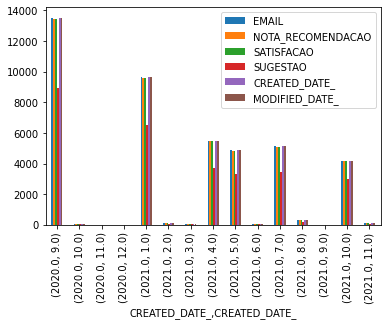

In [43]:
df_nps.groupby([df_nps["CREATED_DATE_"].dt.year, df_nps["CREATED_DATE_"].dt.month]).count().plot(kind="bar")

In [2]:
nps_ = pd.DataFrame(
    {
        'pesquisa-nps': ['2021-01','2021-04','2021-07'],
        'percentagem-de-nao-transacionados': [45.3, 32.5, 22.5]
    })

AttributeError: 'Line2D' object has no property 'kind'

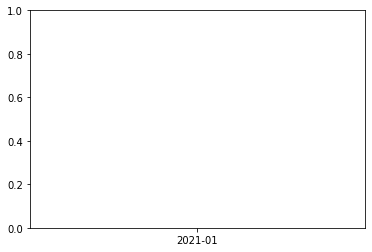

In [136]:
plt.plot(nps_['pesquisa-nps'], nps_['percentagem-de-nao-transacionados'], kind='bar')

<AxesSubplot:>

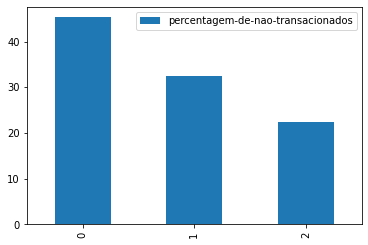

In [133]:
nps_.plot(kind="bar")

In [2]:
test_ = pd.DataFrame(
    {
        'Categoria': ['Realização e Valor Entregue', 'Experciencia e Suporte', 'Adoção e Confiaça'],
        'Porcentagem': [45.3,37.4,17.2]
    })

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

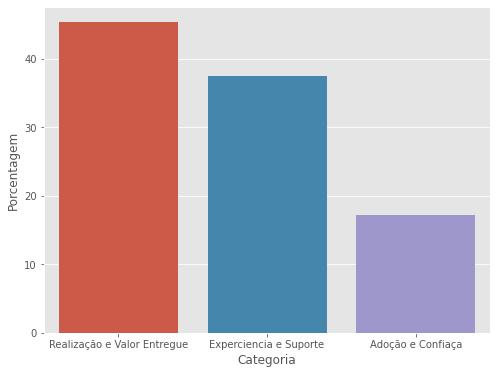

In [21]:
import matplotlib
matplotlib.style.use('ggplot')
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax1 = sns.barplot(x='Categoria', y='Porcentagem', ax=ax, data=test_)
ax.bar_label(ax.containers[0])

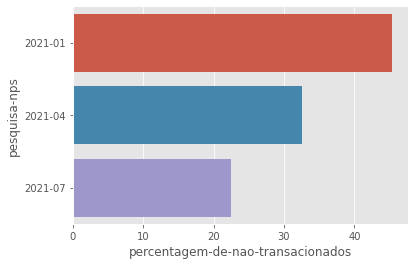

In [141]:
import matplotlib
matplotlib.style.use('ggplot')

ax = sns.barplot(x='percentagem-de-nao-transacionados', y="pesquisa-nps", data=nps_)
ax.get_figure().savefig('nps-transactions-barplot.png')

In [128]:
67.5 - 100

-32.5